In [ ]:
# Install all required libraries
install.packages(c("ggplot2", "dplyr", "tidyr", "corrplot", "ggcorrplot", "tidyverse", "caret", "GGally","caTools","pROC","reshape2"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load the libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(corrplot)
library(ggcorrplot)
library(tidyverse)
library(caret)
library(GGally)
library(caTools)
library(pROC)
library(reshape2)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [ ]:
#load the data
data <- read.csv('https://raw.githubusercontent.com/DennKay/SIM_Assignment/main/diabetes.csv')


#Data Preprocessing

In [ ]:
# Check for missing values
colSums(is.na(data))


Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

In [ ]:
# Check for duplicates
duplicates <- data[duplicated(data), ]
print(duplicates)

[1] Pregnancies              Glucose                  BloodPressure           
[4] SkinThickness            Insulin                  BMI                     
[7] DiabetesPedigreeFunction Age                      Outcome                 
<0 rows> (or 0-length row.names)


In [ ]:
# Specify columns to impute (all except 'Outcome')
columns_to_impute <- setdiff(names(data), "Outcome")

In [ ]:
# Define the outlier removal and imputation function
remove_and_impute_outliers <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  x[x < (Q1 - 1.5 * IQR) | x > (Q3 + 1.5 * IQR)] <- NA
  median_value <- median(x, na.rm = TRUE)
  x[is.na(x)] <- median_value
  return(x)
}
# Apply the function to all columns except the specified one
data[columns_to_impute] <- lapply(data[columns_to_impute], remove_and_impute_outliers)


In [ ]:
#Data splitting
set.seed(123)
split = sample.split(data$Outcome, SplitRatio = 0.8)
train_data = subset(data, split == TRUE)
test_data = subset(data, split == FALSE)

#Exploratory data analysis (EDA)

In [ ]:
# Display head of data
head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,0.356,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
# Display structure of the data
str(data)


'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : num  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 72 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : num  0 0 0 94 168 0 88 0 0 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 32 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 0.356 0.201 0.248 0.134 0.158 0.232 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [ ]:
# Summary statistics
summary(data)

  Pregnancies        Glucose       BloodPressure   SkinThickness  
 Min.   : 0.000   Min.   : 44.00   Min.   : 38.0   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.75   1st Qu.: 64.0   1st Qu.: 0.00  
 Median : 3.000   Median :117.00   Median : 72.0   Median :23.00  
 Mean   : 3.783   Mean   :121.66   Mean   : 72.2   Mean   :20.44  
 3rd Qu.: 6.000   3rd Qu.:140.25   3rd Qu.: 80.0   3rd Qu.:32.00  
 Max.   :13.000   Max.   :199.00   Max.   :106.0   Max.   :63.00  
    Insulin            BMI       DiabetesPedigreeFunction      Age       
 Min.   :  0.00   Min.   :18.2   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.00   1st Qu.:27.5   1st Qu.:0.2437           1st Qu.:24.00  
 Median :  0.00   Median :32.0   Median :0.3560           Median :29.00  
 Mean   : 59.57   Mean   :32.2   Mean   :0.4270           Mean   :32.76  
 3rd Qu.:110.00   3rd Qu.:36.3   3rd Qu.:0.5823           3rd Qu.:40.00  
 Max.   :318.00   Max.   :50.0   Max.   :1.1910           Max.   :66.00  
    Outcome  

In [ ]:
# Display the size of the datasets
cat("Training data size: ", nrow(train_data), "\n")
cat("Testing data size: ", nrow(test_data), "\n")

Training data size:  614 
Testing data size:  154 


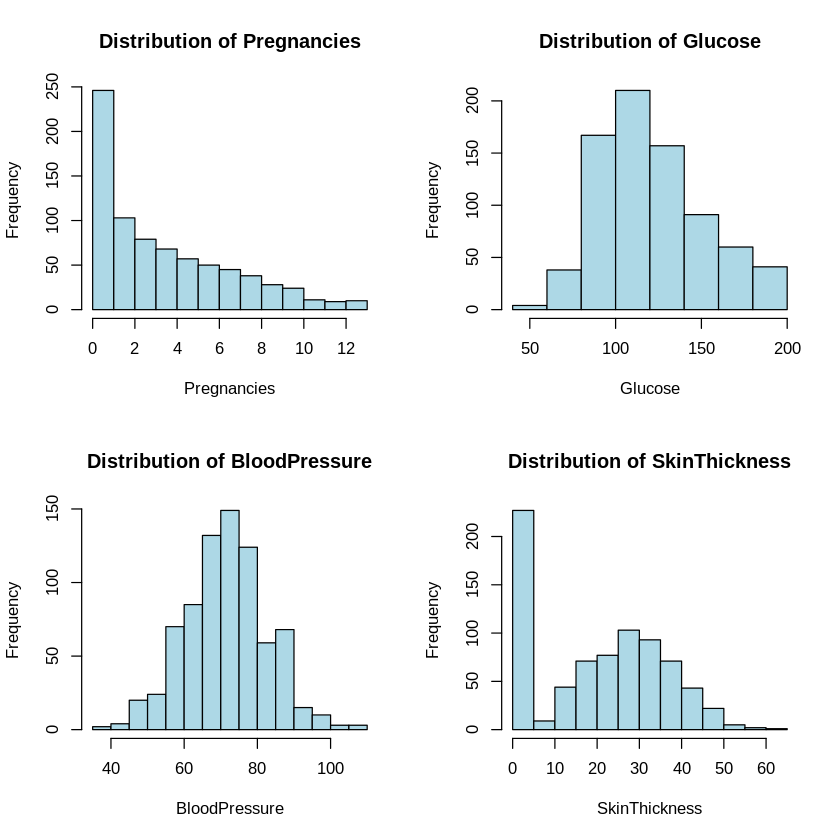

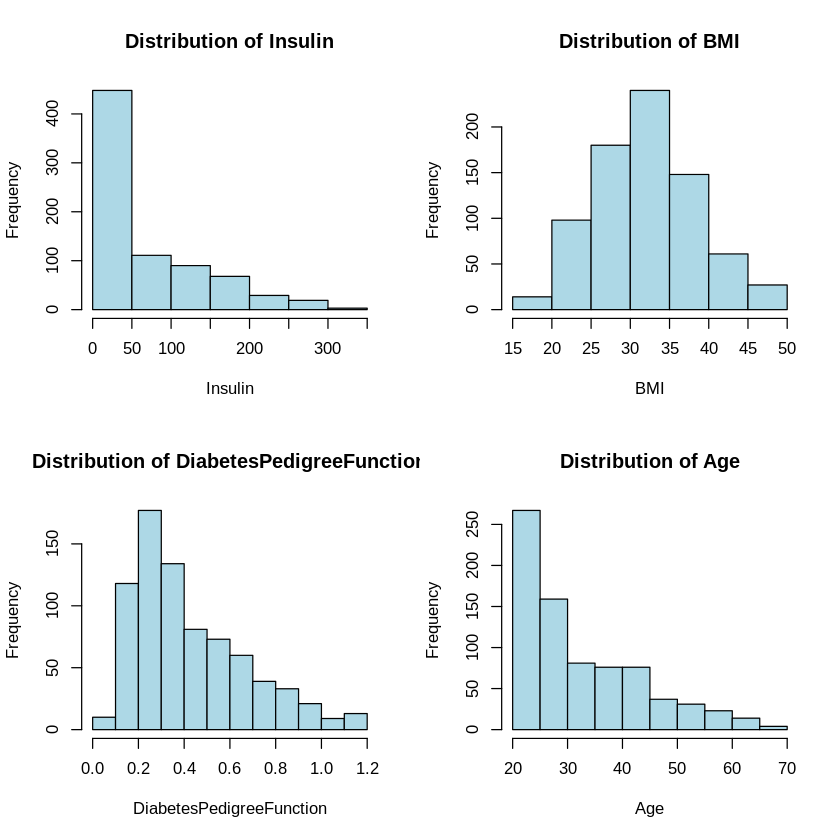

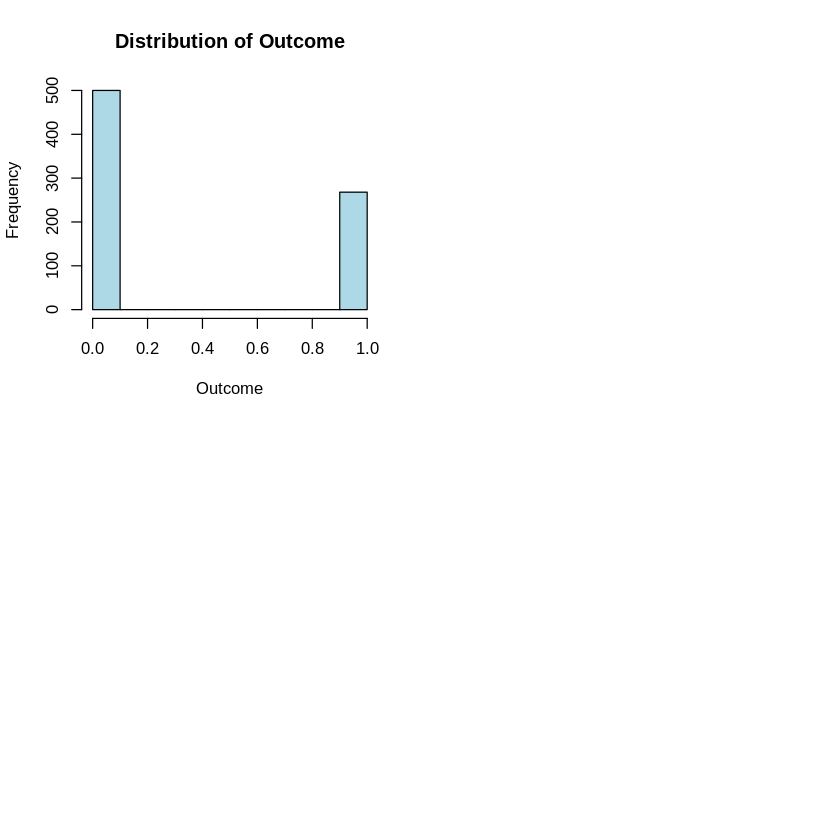

In [ ]:
# Plot histograms for numerical features
num_cols <- names(data)[sapply(data, is.numeric)]
par(mfrow = c(2, 2))
for (col in num_cols) {
hist(data[[col]], main = paste("Distribution of", col), xlab = col, col = "lightblue", border = "black")
}

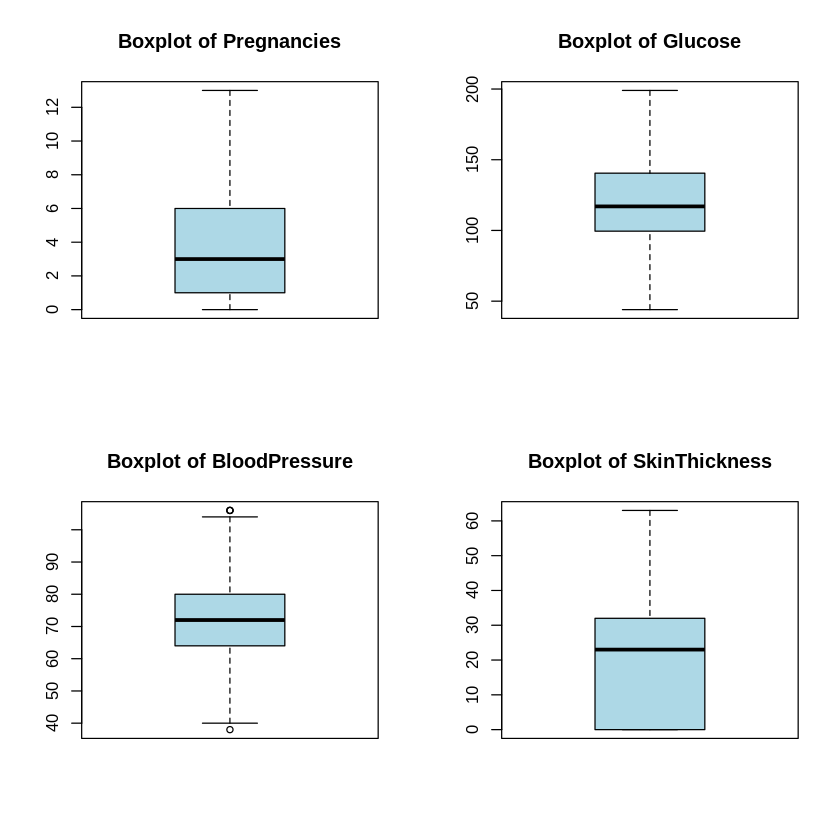

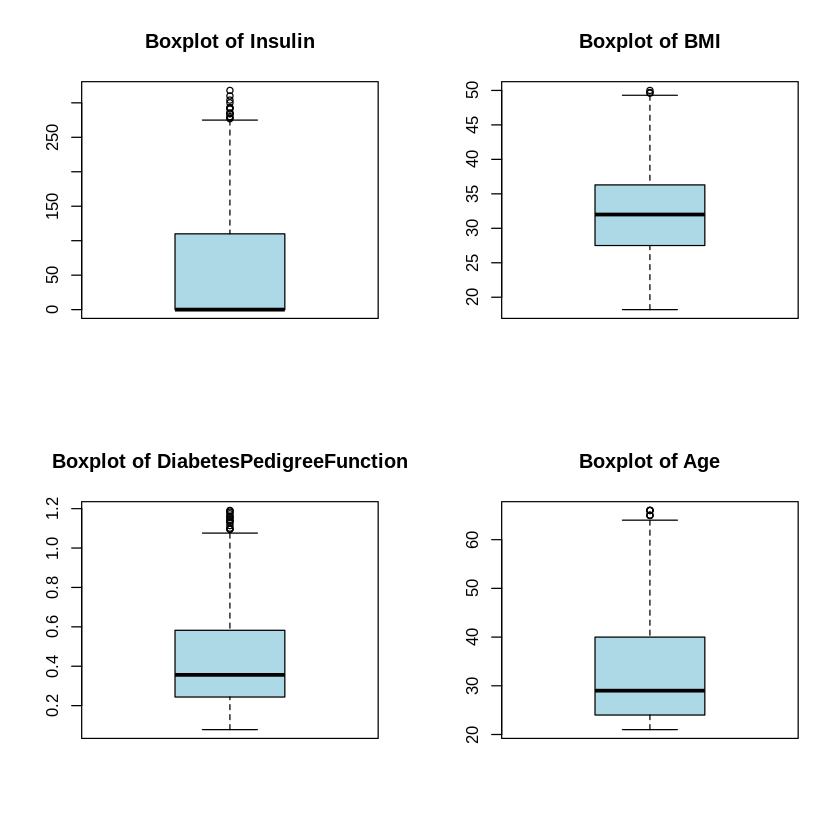

In [ ]:
# Boxplot using ggplot2
par(mfrow = c(2, 2))
for (col in columns_to_impute) {
     boxplot(data[[col]], main = paste("Boxplot of", col), col = "lightblue")
 }


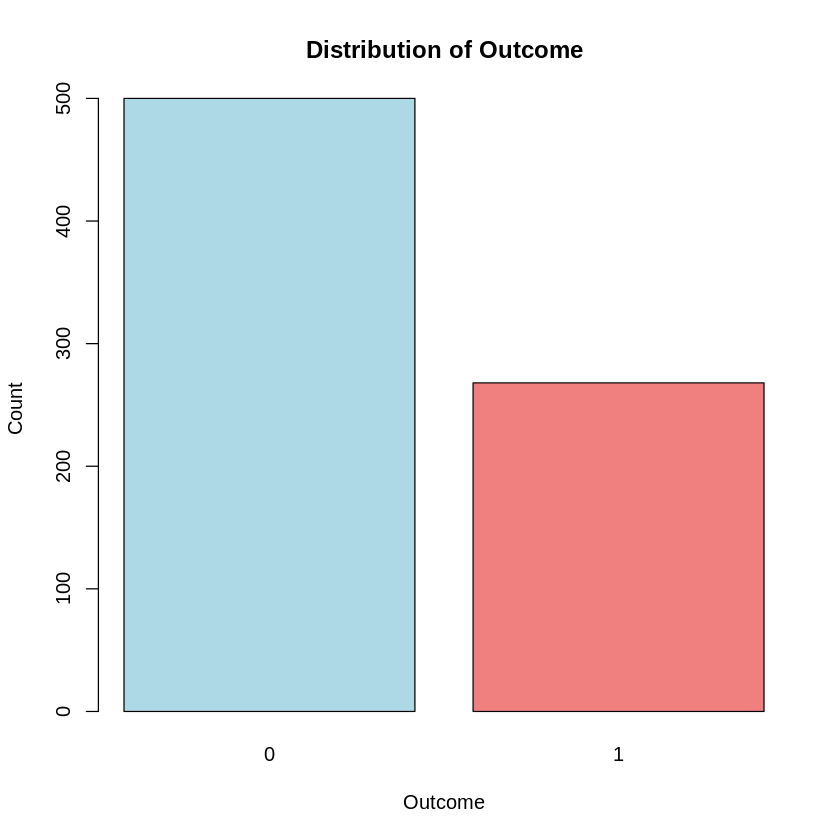

In [ ]:
# Create a bar plot for the boolean variable
barplot(table(data$Outcome),
        main = "Distribution of Outcome",
        xlab = "Outcome",
        ylab = "Count",
        col = c("lightblue", "lightcoral"))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.0,0.1,0.2,-0.1,-0.1,0.0,0.0,0.6
Glucose,0.1,1.0,0.2,0.1,0.2,0.2,0.1,0.3
BloodPressure,0.2,0.2,1.0,0.0,0.0,0.3,0.0,0.3
SkinThickness,-0.1,0.1,0.0,1.0,0.5,0.4,0.2,-0.1
Insulin,-0.1,0.2,0.0,0.5,1.0,0.2,0.2,-0.1
BMI,0.0,0.2,0.3,0.4,0.2,1.0,0.1,0.1
DiabetesPedigreeFunction,0.0,0.1,0.0,0.2,0.2,0.1,1.0,0.0
Age,0.6,0.3,0.3,-0.1,-0.1,0.1,0.0,1.0


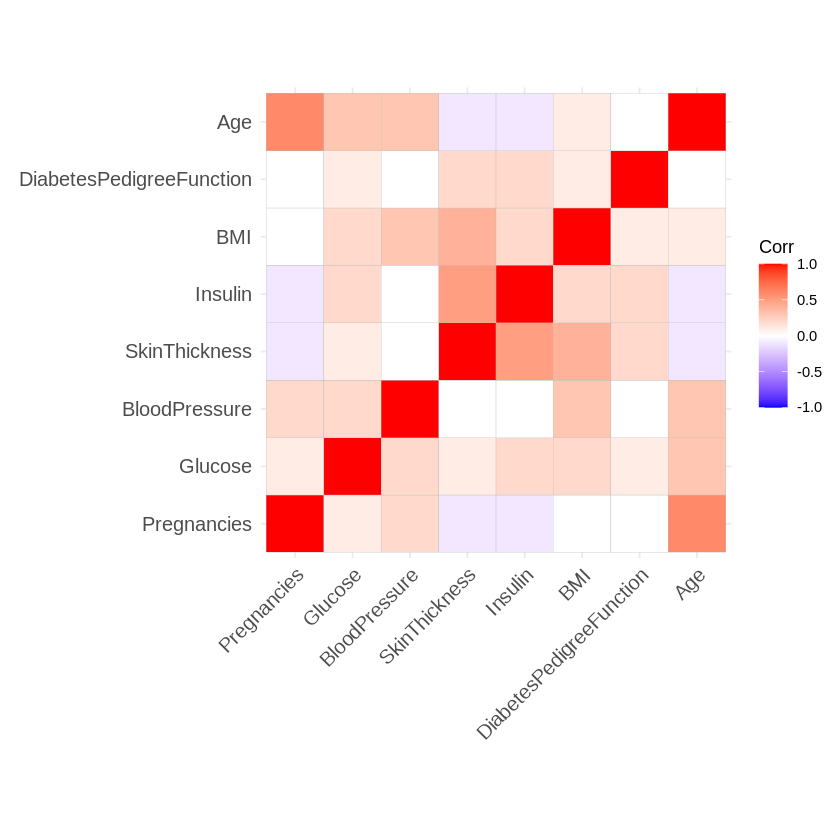

In [ ]:
# Compute correlation matrix
data_cor <- round(cor(data[1:8]),1)
data_cor
ggcorrplot(data_cor)

# Data Analysis Process

In [ ]:
# Fit the logistic regression model
model <- glm(Outcome ~ ., data = test_data, family = binomial)
summary(model)



Call:
glm(formula = Outcome ~ ., family = binomial, data = test_data)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.148e+01  2.184e+00  -5.259 1.45e-07 ***
Pregnancies               4.998e-02  7.534e-02   0.663  0.50704    
Glucose                   3.725e-02  8.261e-03   4.510 6.49e-06 ***
BloodPressure             2.206e-02  2.254e-02   0.979  0.32776    
SkinThickness            -1.144e-02  1.545e-02  -0.741  0.45878    
Insulin                  -6.797e-04  3.328e-03  -0.204  0.83815    
BMI                       9.121e-02  3.635e-02   2.509  0.01211 *  
DiabetesPedigreeFunction  2.727e+00  8.582e-01   3.178  0.00148 ** 
Age                       1.228e-02  2.496e-02   0.492  0.62286    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 199.54  on 153  degrees of freedom
Residual deviance: 138.81  on 145  degrees of freedom


In [ ]:
# Make predictions
predictions <- predict(model, newdata = test_data, type = "response")
# Convert predictions to binary outcome (threshold 0.5)
predicted_classes <- ifelse(predictions > 0.5, 1, 0)
# Define true labels for the test dataset
true_labels <- test_data$Outcome

In [ ]:
# Evaluate the model using a confusion matrix
confusion_matrix <- table(Predicted = predicted_classes, Actual = true_labels)
# Print the confusion matrix
print(confusion_matrix)

         Actual
Predicted  0  1
        0 84 21
        1 16 33


In [ ]:
# Calculate accuracy
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
# Print accuracy
cat("Accuracy:", accuracy, "\n")


Accuracy: 0.7597403 


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8578


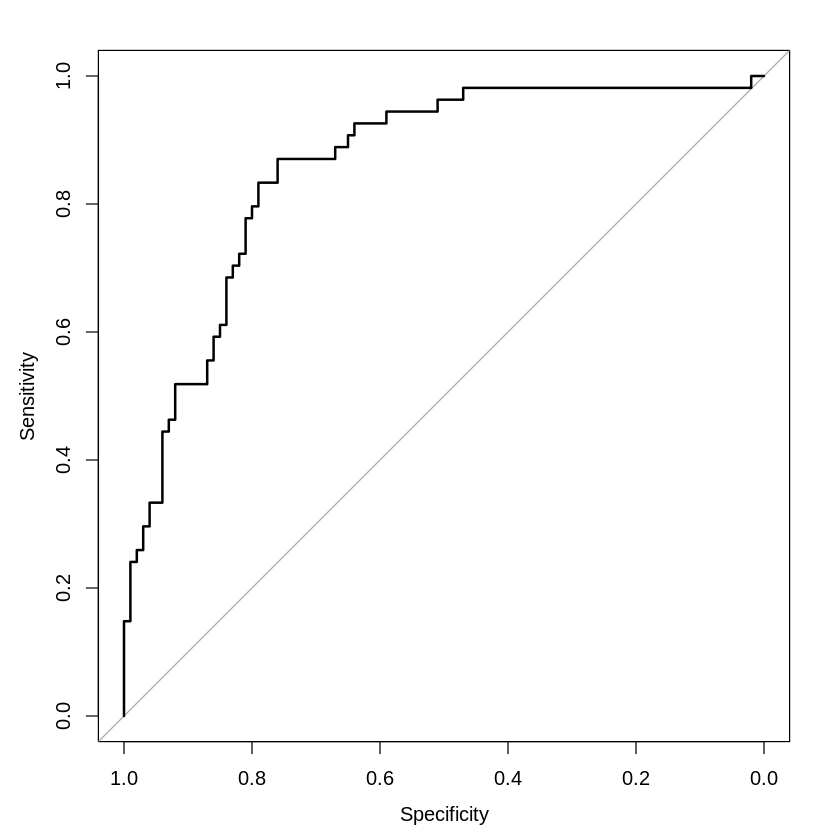

In [ ]:
# Create ROC object
roc_obj <- roc(true_labels, predictions)

# Plot the ROC curve
plot(roc_obj)

# Calculate and print AUC
auc_value <- auc(roc_obj)
print(auc_value)